# Assignment 7
### Do any five.

## 1. 

- What is the expected value of a single die roll? 
$$
\mathbb{E}[X] = \frac{1}{6}1+\frac{1}{6}2+\frac{1}{6}3+\frac{1}{6}4+\frac{1}{6}5+\frac{1}{6}6 = \frac{21}{6}
$$
- What is the expected value of rolling two dice and adding the results together?
$$
\mathbb{E}[X] = 
\frac{1}{36}2 +
\frac{2}{36}3 +
\frac{3}{36}4 +
\frac{4}{36}5 +
\frac{5}{36}6 +
\frac{6}{36}7 +
\frac{5}{36}8 +
\frac{4}{36}9 +
\frac{3}{36}10 +
\frac{2}{36}11 +
\frac{1}{36}12 = \frac{252}{36} = 7
$$
- What is the expected winnings of any gamble in European roulette?
\begin{alignat*}{2}
\mathbb{E}[X] &=& \frac{K}{37}  \frac{36}{K} + \dfrac{37-K}{37}0 -1 \\
&=& \frac{36}{37} -1 \\
&=& -0.027
\end{alignat*}
- Imagine you roll a die, and you record the value you get. But, if you roll a six, you roll again, and add that value. What is the expected value?
$$
\mathbb{E}[X] = \dfrac{1}{6}1+\dfrac{1}{6}2+\dfrac{1}{6}3+\dfrac{1}{6}4+\dfrac{1}{6}5+\dfrac{1}{6}\left(6 + \dfrac{1}{6}1+\dfrac{1}{6}2+\dfrac{1}{6}3+\dfrac{1}{6}4+\dfrac{1}{6}5+\dfrac{1}{6}6 \right)
$$
$$
\mathbb{E}[X] = \dfrac{1}{6}1+\dfrac{1}{6}2+\dfrac{1}{6}3+\dfrac{1}{6}4+\dfrac{1}{6}5+\dfrac{1}{6}\left(6 + 3.5\right)
$$
$$
\mathbb{E}[X] = 3.5+\dfrac{3.5}{6} = \frac{24.5}{6} \approx 4.083
$$
- Imagine that the process described in the last question continues until you fail to roll a six. What is the expected value of the process? (This can be tricky, you can simulate it to get an answer if you prefer. Hint: The answer is 4.2.)

Simulated value of the process: 4.19602


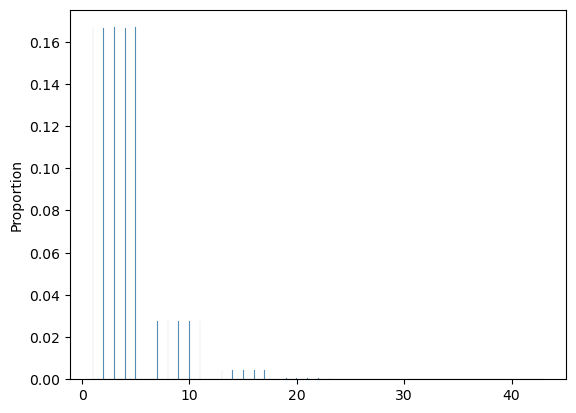

In [1]:
import numpy as np
import seaborn as sns

rng = np.random.default_rng(100)

def simulate():
    sum = 0
    on = 1
    while on == 1:
        roll = rng.integers(1,7)
        sum += roll
        if( roll < 6 ):
            on = 0
    return sum

n_sample = 1000000
results = [simulate() for i in range(n_sample)]

sns.histplot(results,stat='proportion')

print(f'Simulated value of the process: {np.mean(results)}')

## 2. 
- Compute the expected value for a uniform random variable.
$$
\int_0^1 x \times 1 dx =  \int_0^1 d \left\lbrace \frac{1}{2} x^2 \right\rbrace = \frac{1}{2}1^2 - \frac{1}{2}0^2 = \frac{1}{2}
$$
- Show that $\mathbb{E}[a+bX] = a + b\mathbb{E}[X]$
$$
\mathbb{E}[a+bX] = \int_{-\infty}^{+\infty} (a + bx)f(x)dx = \int_{-\infty}^{+\infty} af(x) + bxf(x)dx = a \int_{-\infty}^{+\infty} f(x)dx + b \int_{-\infty}^{+\infty} xf(x)dx =a + b \mathbb{E}[X]
$$
since $ \int_a^b f(x) dx = F(b) - F(a)$, and $F(-\infty)=0$ and $F(+\infty)=1$.

- Show, by example, that $v(\mathbb{E}[X]) \neq \mathbb{E}[v(X)]$, if $v(x) \neq a+bx$. For example, try $v(y) = y^2$ or $v(y)=\sqrt{y}$ with a Bernoulli or uniform or normally distributed random variable. This can be an important thing to remember: The expectation of a transformed random variable is not the transformation of the expected value.

Expected Value: 0.6641328806390909
Value of Expectation: 0.7050666739086444


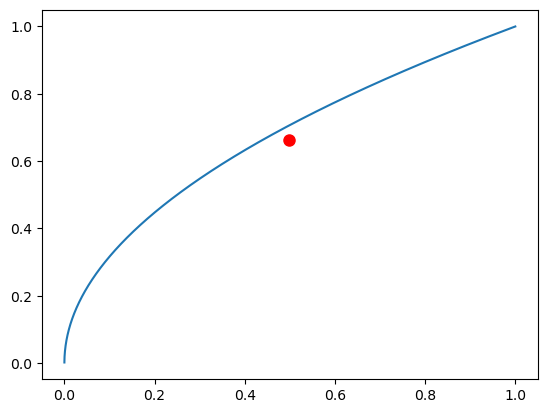

In [2]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

def v(x):
    return np.sqrt(x)

sample = np.random.uniform(low=0, high=1,size = 20000)

Ev_of_sample = np.mean( v(sample) )
print(f'Expected Value: {Ev_of_sample}')

v_of_EX = v(np.mean(sample))
print(f'Value of Expectation: {v_of_EX}')

sns.lineplot(x=sample, y=v(sample))
plt.plot(np.mean(sample),Ev_of_sample, 'o', color='red', markersize=8)


So the expected value of $\sqrt{x}$ for a uniformly distributed variable over $[0,1]$ is about .6687, while $v(\mathbb{E}[X]) = \sqrt{.5} \approx .7089$.

We can do this calculation explicitly:
$$
\int_{0}^{1} \sqrt{x} dx =  \int_{0}^{1} d\left\lbrace \frac{2}{3}x^{3/2} \right\rbrace  = \dfrac{2}{3} \approx .6687
$$
versus
$$
\sqrt{\int_{0}^{1} x dx} =  \sqrt{.5} \approx .7089.
$$
These are fundamentally different things. There's an inequality that is generally useful here, called **Jensen's Inequality**.

## 3. 
- Compute the variance for a uniform random variable.
$$
\int_0^1 (x-.5)^2 \times 1 dx = \int_0^1 x^2 - x + .25 dx = \int_0^1 d\left\lbrace \frac{1}{3} x^3 - \frac{1}{2}x^2 + .25x \right\rbrace = \frac{1}{3}-\frac{1}{2}+\frac{1}{4} = \frac{1}{12}
$$
- Show that 
$$
\mathbb{V}[X] = \mathbb{E}[X^2] - \mathbb{E}[X]^2
$$

\begin{alignat*}{2}
\mathbb{V}[X] &=& \int (x-\mathbb{E}[X])^2 f(x) dx \\
&=& \int (x^2 - 2 x \mathbb{E}[X] + \mathbb{E}[X]^2 ) f(x) dx \\
&=& \int x^2 f(x)dx - 2 \int xf(x)dx \mathbb{E}[X] + \mathbb{E}[X]^2\\
&=& \mathbb{E}[X^2] - 2 \mathbb{E}[X]^2 + \mathbb{E}[X]^2\\
&=& \mathbb{E}[X^2] - \mathbb{E}[X]^2\\
\end{alignat*}
- Show that 
$$
\mathbb{V}[a+bX] = b^2 \mathbb{V}[X]
$$

\begin{alignat*}{2}
\mathbb{V}[a+bX] &=& \int (a+bX - \mathbb{E}[a+bX])^2 f(x)dx \\
&=& \int (a+bX - a - b \mathbb{E}[X])^2 f(x)dx \\
&=& \int (bX - b \mathbb{E}[X])^2 f(x)dx \\
&=& \int b^2(X - \mathbb{E}[X])^2 f(x)dx \\
&=&  b^2\int(X - \mathbb{E}[X])^2 f(x)dx \\
&=&  b^2 \mathbb{V}[X]
\end{alignat*}
- Show that if $X$ is a normally distributed random variable, then $a + bX$ is distributed normally with mean $a+ b \mathbb{E}[X]$ and variance $b^2 \sigma_X^2$

These properties get used all the time!
\begin{alignat*}{2}
F_X\left( \frac{Y-a}{b} \right) &=& \int_{-\infty}^{+\infty} \frac{1}{\sqrt{2 \pi}} \exp \left\rbrace - \frac{1}{2} \left( \dfrac{(Y-a)/b - \mu}{\sigma} \right)^2  \right\rbrace dx \\
&=& \int_{-\infty}^{+\infty} \frac{1}{\sqrt{2 \pi}} \exp \left\lbrace - \frac{1}{2} \left( \dfrac{Y-a - b\mu}{b\sigma} \right)^2  \right\rbrace dx
\end{alignat*}
$$
F_Y(Y) = \int_{-\infty}^{+\infty} \frac{1}{\sqrt{2 \pi}} \exp \left\lbrace - \frac{1}{2} \left( \dfrac{Y-\mu'}{\sigma'} \right)^2  \right\rbrace dx
$$
So $Y$ is distributed normally, with mean $\mathbb{E}[Y] = a + b \mathbb{E}[X]$ and standard deviation $\sigma_Y' = b \sigma_X$.


## 6.
- Use the Taylor series expansions 
$$
F(x+h) = F(x) + hf(x) + \frac{h^2}{2}f'(x) + O(h^3)
$$ 
and 
$$
F(x-h) = F(x) - h f(x) + \frac{h^2}{2} f'(x)+ O(h^3)
$$
to show that
$$
\mathbb{E}[\hat{f}_{X,h}(x)] = \frac{F(x+h)-F(x-h)}{2h} = f(x) + O(h^2),
$$
so the **bias** of the KDE is $O(h^2)$, unlike the ECDF, for which $\mathbb{E}[\hat{F}(x)] = F(x)$.
$$
\mathbb{E}[\hat{f}_{X,h}(x)] = \frac{F(x+h)-F(x-h)}{2h}
$$
Substituting in the given Taylor series approximations,
\begin{alignat*}{2}
\mathbb{E}[\hat{f}_{X,h}(x)] &=& \frac{F(x) + hf(x) + \frac{h^2}{2}f'(x) + O(h^3)-F(x) + h f(x) - \frac{h^2}{2} f'(x)- O(h^3)}{2h} \\
&=& \frac{ 2hf(x)  + O(h^3) + h f(x)- O(h^3)}{2h} \\
&=& f(x) + \frac{  O(h^3) - O(h^3)}{2h}\\
&=& f(x) + O(h^2)
\end{alignat*}

## 8.
- Open the METABRIC data. Make a histogram of 'Ratio Therapy'.
- Let treatment, $T$ be distributed binomial with parameter $p$. Then the contribution to the likelihood for each patient $i$, with $y_i = 0$ for no radiation therapy and $y_i=1$ for radiation therapy, is 
$$
p^{y_i}(1-p)^{1-y_i}
$$
- Write out the likelihood.
- Maximize the likelihood with respect to $p$. What is the MLE, $\hat{p}$?
- Bootstrap the sampling density/distribution of $\hat{p}$.

<Axes: xlabel='Radio Therapy', ylabel='Proportion'>

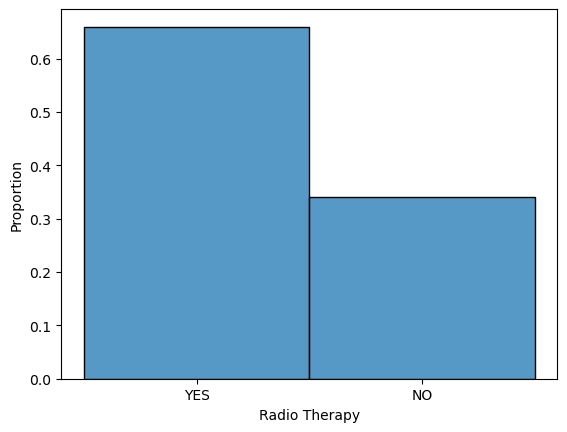

In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy as sp 

df = pd.read_csv('./data/metabric.csv')

y = df['Radio Therapy']
sns.histplot(y,stat='proportion')

The likelihood is 
$$
L(p) = \prod_{i=1}^n p^{y_i}(1-p)^{1-y_i}
$$

To maximize, we first take logs:
$$
\ell(p) = \sum_{i=1}^n y_i \log(p) + (1-y_i) \log(1-p)
$$
and
$$
\ell'(p) = \sum_{i=1}^n y_i \frac{1}{p} - (1-y_i) \frac{1}{1-p}
$$
At the optimum, we have
$$
\sum_{i=1}^n y_i \frac{1}{\hat{p}} - (1-y_i) \frac{1}{1-\hat{p}} = 0
$$
Solving the first-order condition for $p$ yields the MLE
$$
\hat{p} = \dfrac{1}{n} \sum_{i=1}^n y_i.
$$

MLE:  0.659717051377513


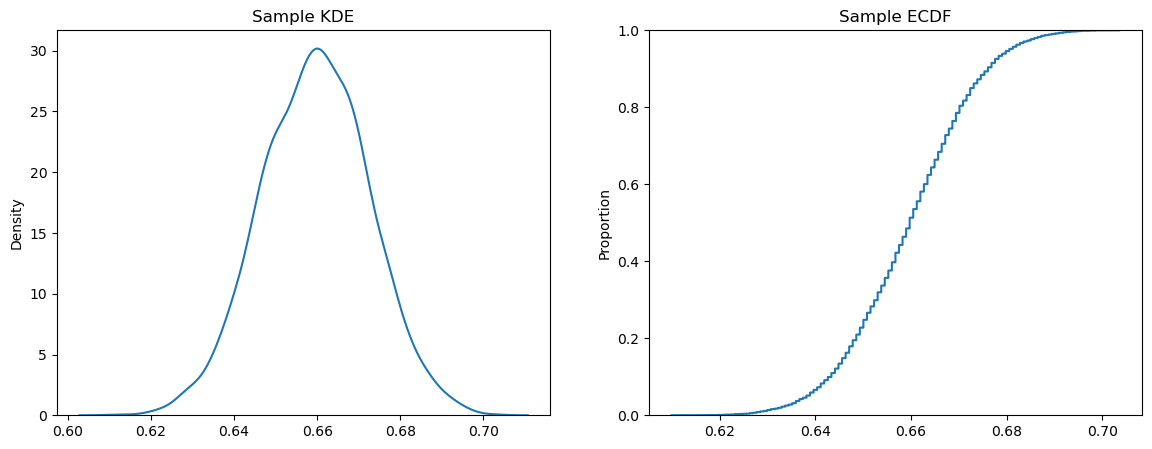

In [4]:
y = pd.to_numeric( y.replace({'NO':'0','YES':'1'}) , errors='coerce' ) # Convert string to numeric
print(f'MLE: ', y.mean())

S = 5000
sample = [ np.mean( y.sample(frac=1,replace=True) ) for s in range(S) ]

fig, axes = plt.subplots(1,2,figsize=(14,5))
sns.kdeplot(x=sample,ax=axes[0],label='kde')
axes[0].set_title('Sample KDE')
sns.ecdfplot(x=sample,ax=axes[1],label='ecdf')
axes[1].set_title('Sample ECDF')
plt.show()